# The Duckworth Lewis Method

  The cricket fans might be familiar with this term. To know more about it and to To download the  dataset go this website [The Duckworth Lewis Method](http://www.cricketabstract.com/?dwl).In this program we are using a different method to solve for the run production function. We are gonna find all the 11 parameter in a single cure_fit rather than finding it seperately


## <font color='red'> **Run Production Functions**</font>
1. First we import all the required libraries
2. The read the CSV file to df which contains data on ODI matches from 1999 to 2011
3. Then dr from df is created with the requied columns(All the columns which was not required are removed)
4. An extra column Over_Remaining is created

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:
df=pd.read_csv('04_cricket_1999to2011.csv')
df

,Match,Date,Innings,Over,Runs,Total.Runs,Innings.Total.Runs,Runs.Remaining,Total.Out,Innings.Total.Out,...,at.bat.won.toss,at.bat.at.home,at.bat.bat.first,chose_bat_1st,chose_bat_2nd,forced_bat_1st,forced_bat_2nd,new.game,Error.In.Data,common.support
0,65193,14/05/1999,1,1,4,4,204,200,0,10,...,0,0,1,0,0,1,0,1,0,1
1,65193,14/05/1999,1,2,2,6,204,198,0,10,...,0,0,1,0,0,1,0,0,0,1
2,65193,14/05/1999,1,3,3,9,204,195,0,10,...,0,0,1,0,0,1,0,0,0,1
3,65193,14/05/1999,1,4,2,20,204,184,0,10,...,0,0,1,0,0,1,0,0,0,1
4,65193,14/05/1999,1,5,6,37,204,167,0,10,...,0,0,1,0,0,1,0,0,0,1
5,65193,14/05/1999,1,6,3,40,204,164,0,10,...,0,0,1,0,0,1,0,0,0,1
6,65193,14/05/1999,1,7,2,42,204,162,1,10,...,0,0,1,0,0,1,0,0,0,1
7,65193,14/05/1999,1,8,1,43,204,161,1,10,...,0,0,1,0,0,1,0,0,0,1
8,65193,14/05/1999,1,9,7,50,204,154,1,10,...,0,0,1,0,0,1,0,0,0,1
9,65193,14/05/1999,1,10,0,50,204,154,2,10,...,0,0,1,0,0,1,0,0,0,1


In [3]:
#Add a new column over remaining
#We are using only first innings data sor make dr which contains 1st innings data
df['Overs_Remaining']=50-df['Over']
dr=df.loc[(df['Innings']==1)]

In [4]:
#Remove all other columns which are not required for our analisis
drr=dr[['Overs_Remaining','Wickets.in.Hand','Runs.Remaining']]
drr

,Overs_Remaining,Wickets.in.Hand,Runs.Remaining
0,49,10,200
1,48,10,198
2,47,10,195
3,46,10,184
4,45,10,167
5,44,10,164
6,43,9,162
7,42,9,161
8,41,9,154
9,40,8,154


In [5]:
Y_1=drr.iloc[:,0].values
Y_2=drr.iloc[:,1].values
Y_3=drr.iloc[:,2].values

# <font color='red'>NonLinear Regression to find parameters Z(1)-Z(10) And L</font>

In [6]:

def func(X, Z1, Z2, Z3, Z4, Z5, Z6, Z7, Z8, Z9, Z10,L):
    Y_1,Y_2 = X
    t=(Z1*(Y_2==1)+Z2*(Y_2==2)+Z3*(Y_2==3)+Z4*(Y_2==4)+Z5*(Y_2==5)+Z6*(Y_2==6)+Z7*(Y_2==7)+Z8*(Y_2==8)+Z9*(Y_2==9)+Z10*(Y_2==10))+1
    z=t*(1-np.exp(-Y_1*L/t))
    
    
    return z
p0=[13.9,28.1,38.1,57.4,90.6,136.8,157.8,231.8,305.6,331.6,10.5]
P,PCOV= (curve_fit(func, (Y_1,Y_2), Y_3, p0))

In [7]:
L=P[10]
y_1=np.zeros(50)
x=np.zeros(50)
for i in range(1,50):
    y_1[i]=P[0]*(1-np.exp(-L*i/P[0]))
    x[i]=i
y_2=np.zeros(50)
for i in range(1,50):
    y_2[i]=P[1]*(1-np.exp(-L*i/P[1]))
y_3=np.zeros(50)
for i in range(1,50):
    y_3[i]=P[2]*(1-np.exp(-L*i/P[2]))
y_4=np.zeros(50)
for i in range(1,50):
    y_4[i]=P[3]*(1-np.exp(-L*i/P[3]))
y_5=np.zeros(50)
for i in range(1,50):
    y_5[i]=P[4]*(1-np.exp(-L*i/P[4]))
y_6=np.zeros(50)
for i in range(1,50):
    y_6[i]=P[5]*(1-np.exp(-L*i/P[5]))
y_7=np.zeros(50)
for i in range(1,50):
    y_7[i]=P[6]*(1-np.exp(-L*i/P[6]))
y_8=np.zeros(50)
for i in range(1,50):
    y_8[i]=P[7]*(1-np.exp(-L*i/P[7]))
y_9=np.zeros(50)
for i in range(1,50):
    y_9[i]=P[8]*(1-np.exp(-L*i/P[8]))
y_10=np.zeros(50)
for i in range(1,50):
    y_10[i]=P[9]*(1-np.exp(-L*i/P[9]))

# <font color='red'>Chart: Fitted Production functions based on real data 1999-2011</font>

<IPython.core.display.Javascript object>


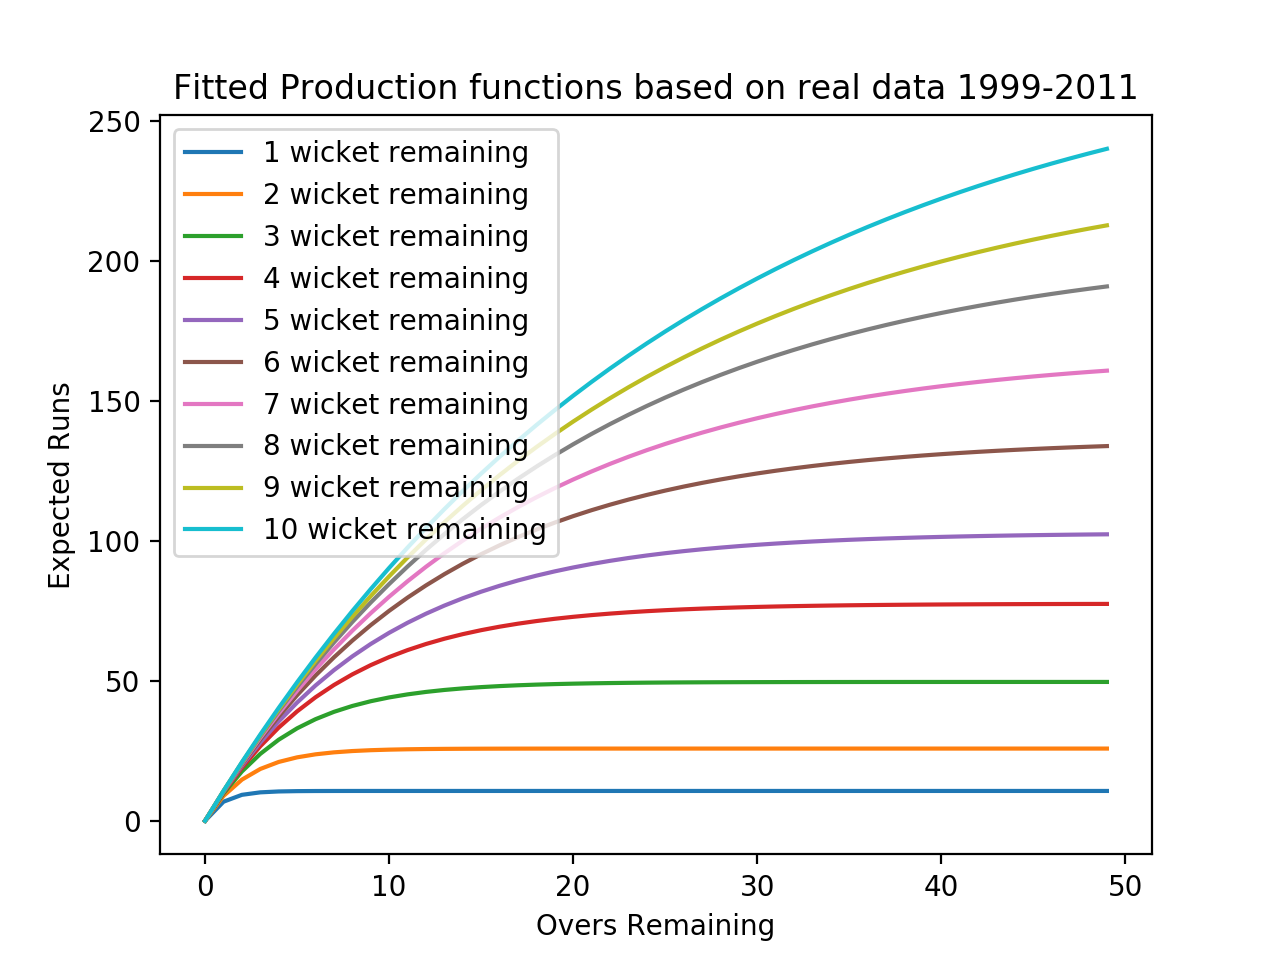

In [8]:
%matplotlib notebook
plt.xlabel("Overs Remaining")
plt.ylabel("Expected Runs")
plt.title("Fitted Production functions based on real data 1999-2011")
plt.plot(x,y_1,label="1 wicket remaining") 
plt.plot(x,y_2,label="2 wicket remaining")
plt.plot(x,y_3,label="3 wicket remaining")
plt.plot(x,y_4,label="4 wicket remaining")
plt.plot(x,y_5,label="5 wicket remaining")
plt.plot(x,y_6,label="6 wicket remaining")
plt.plot(x,y_7,label="7 wicket remaining")
plt.plot(x,y_8,label="8 wicket remaining")
plt.plot(x,y_9,label="9 wicket remaining")
plt.plot(x,y_10,label="10 wicket remaining")
plt.legend()

# <font color='red'>Table:Parameters Extimates based on real data 1999-2011</font>

In [9]:
l1=[P[0]]
l2=[P[1]]
l3=[P[2]]
l4=[P[3]]
l5=[P[4]]
l6=[P[5]]
l7=[P[6]]
l8=[P[7]]
l9=[P[8]]
l10=[P[9]]
ll=[L]
Parameters=pd.DataFrame(
    {'Z(1)':l1,
     'Z(2)':l2,
     'Z(3)':l3,
     'Z(4)':l4,
     'Z(5)':l5,
     'Z(6)':l6,
     'Z(7)':l7,
     'Z(8)':l8,
     'Z(9)':l9,
     'Z(10)':l10,
     'L':ll,
})

In [10]:
Parameters

,Z(1),Z(2),Z(3),Z(4),Z(5),Z(6),Z(7),Z(8),Z(9),Z(10),L
0,10.666333,25.808026,49.618493,77.579295,102.946581,136.6538,167.842054,206.571369,238.137131,283.215441,10.882216


# <font color='red'>Standard Deviation Calculation</font>

In [11]:
p_sigma = np.sqrt(np.diag(PCOV))

In [12]:
L1=[p_sigma[0]]
L2=[p_sigma[1]]
L3=[p_sigma[2]]
L4=[p_sigma[3]]
L5=[p_sigma[4]]
L6=[p_sigma[5]]
L7=[p_sigma[6]]
L8=[p_sigma[7]]
L9=[p_sigma[8]]
L10=[p_sigma[9]]
Ll=[p_sigma[10]]
Standard_deviation=pd.DataFrame(
    {'Z(1)SE':L1,
     'Z(2)SE':L2,
     'Z(3)SE':L3,
     'Z(4)SE':L4,
     'Z(5)SE':L5,
     'Z(6)SE':L6,
     'Z(7)SE':L7,
     'Z(8)SE':L8,
     'Z(9)SE':L9,
     'Z(10)SE':L10,
     'LSE':Ll,
})

In [13]:
Standard_deviation

,Z(1)SE,Z(2)SE,Z(3)SE,Z(4)SE,Z(5)SE,Z(6)SE,Z(7)SE,Z(8)SE,Z(9)SE,Z(10)SE,LSE
0,1.393973,1.275966,1.175323,1.128505,0.978916,1.000223,1.002555,1.097894,1.162989,1.391548,0.068378


In [15]:
s=0
h=1
ll
for i in range(0,67794):
    if Y_2[i]==1:
        h=l1[0]
    elif Y_2[i]==2:
        h=l2[0]
    elif Y_2[i]==3:
        h=l3[0]
    elif Y_2[i]==4:
        h=l4[0]
    elif Y_2[i]==5:
        h=l5[0]
    elif Y_2[i]==6:
        h=l6[0]
    elif Y_2[i]==7:
        h=l7[0]
    elif Y_2[i]==8:
        h=l8[0]
    elif Y_2[i]==9:
        h=l9[0]
    elif Y_2[i]==10:
        h=l10[0]
    s = s+(Y_3[i]-h*(1-np.exp(-Y_1[i]*ll[0]/h)))*(Y_3[i]-h*(1-np.exp(-Y_1[i]*ll[0]/h)))


In [16]:
print ("error")
s

error


105113107.79225203